# Bank Data 딥러닝, 머신러닝 활용 

In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

In [54]:
Bank_data = pd.read_csv('DATA/bank.csv')

In [55]:
# Bank Data EDA 체크 
print(Bank_data.head())
print(Bank_data.info())
print(Bank_data.describe())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

In [56]:
# Bank_data의 object의 unique 값 확인 
for _columns in Bank_data.columns : 
    if Bank_data[_columns].dtypes == "object" : # 타입이 object 타입인지 확인 한다. 
        print( _columns, ":", Bank_data[_columns].unique() )

job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital : ['married' 'single' 'divorced']
education : ['secondary' 'tertiary' 'primary' 'unknown']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'other' 'failure' 'success']
deposit : ['yes' 'no']


In [53]:
# 데이터 분석을 진행할 데이터 구함 


In [20]:
label_encoder = LabelEncoder() # 라벨 인코더 생성 

for _columns in _Bank_Data.columns : 
    if _Bank_Data[_columns].dtypes == "object" : # 타입이 object 타입인지 확인 한다. 
        # label_encoder.fit_transform(_Bank_Data[_columns]) 으로 한번 에 사용해도 된다. 
        label_encoder.fit(_Bank_Data[_columns])
        _Bank_Data[_columns] = label_encoder.transform(_Bank_Data[_columns])
# Bank_data.dtypes()

In [21]:
# 변환된 데이터 값 확인 
_Bank_Data.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


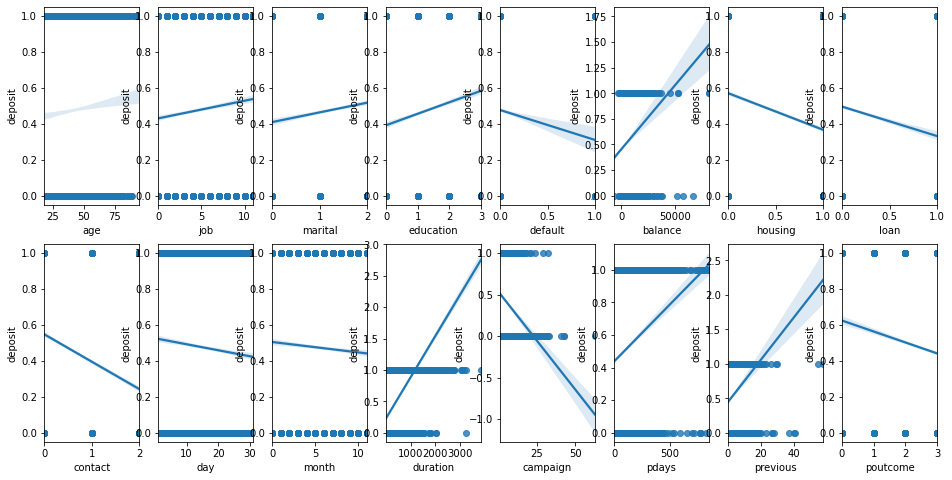

In [26]:
#각 값들이 얼마나 유효한지 확인 진행 
ncol = len(_Bank_Data.columns) - 1
ncol = int(ncol/2)
fig, axs = plt.subplots(figsize=(16,8) , ncols= ncol , nrows=2)

for i, _columns in enumerate(_Bank_Data.columns[ : -1]) : 
    row = int( i / ncol )
    col = i % ncol
    sns.regplot(x=_columns , y=_Bank_Data.columns[-1] ,data=_Bank_Data , ax=axs[row][col])


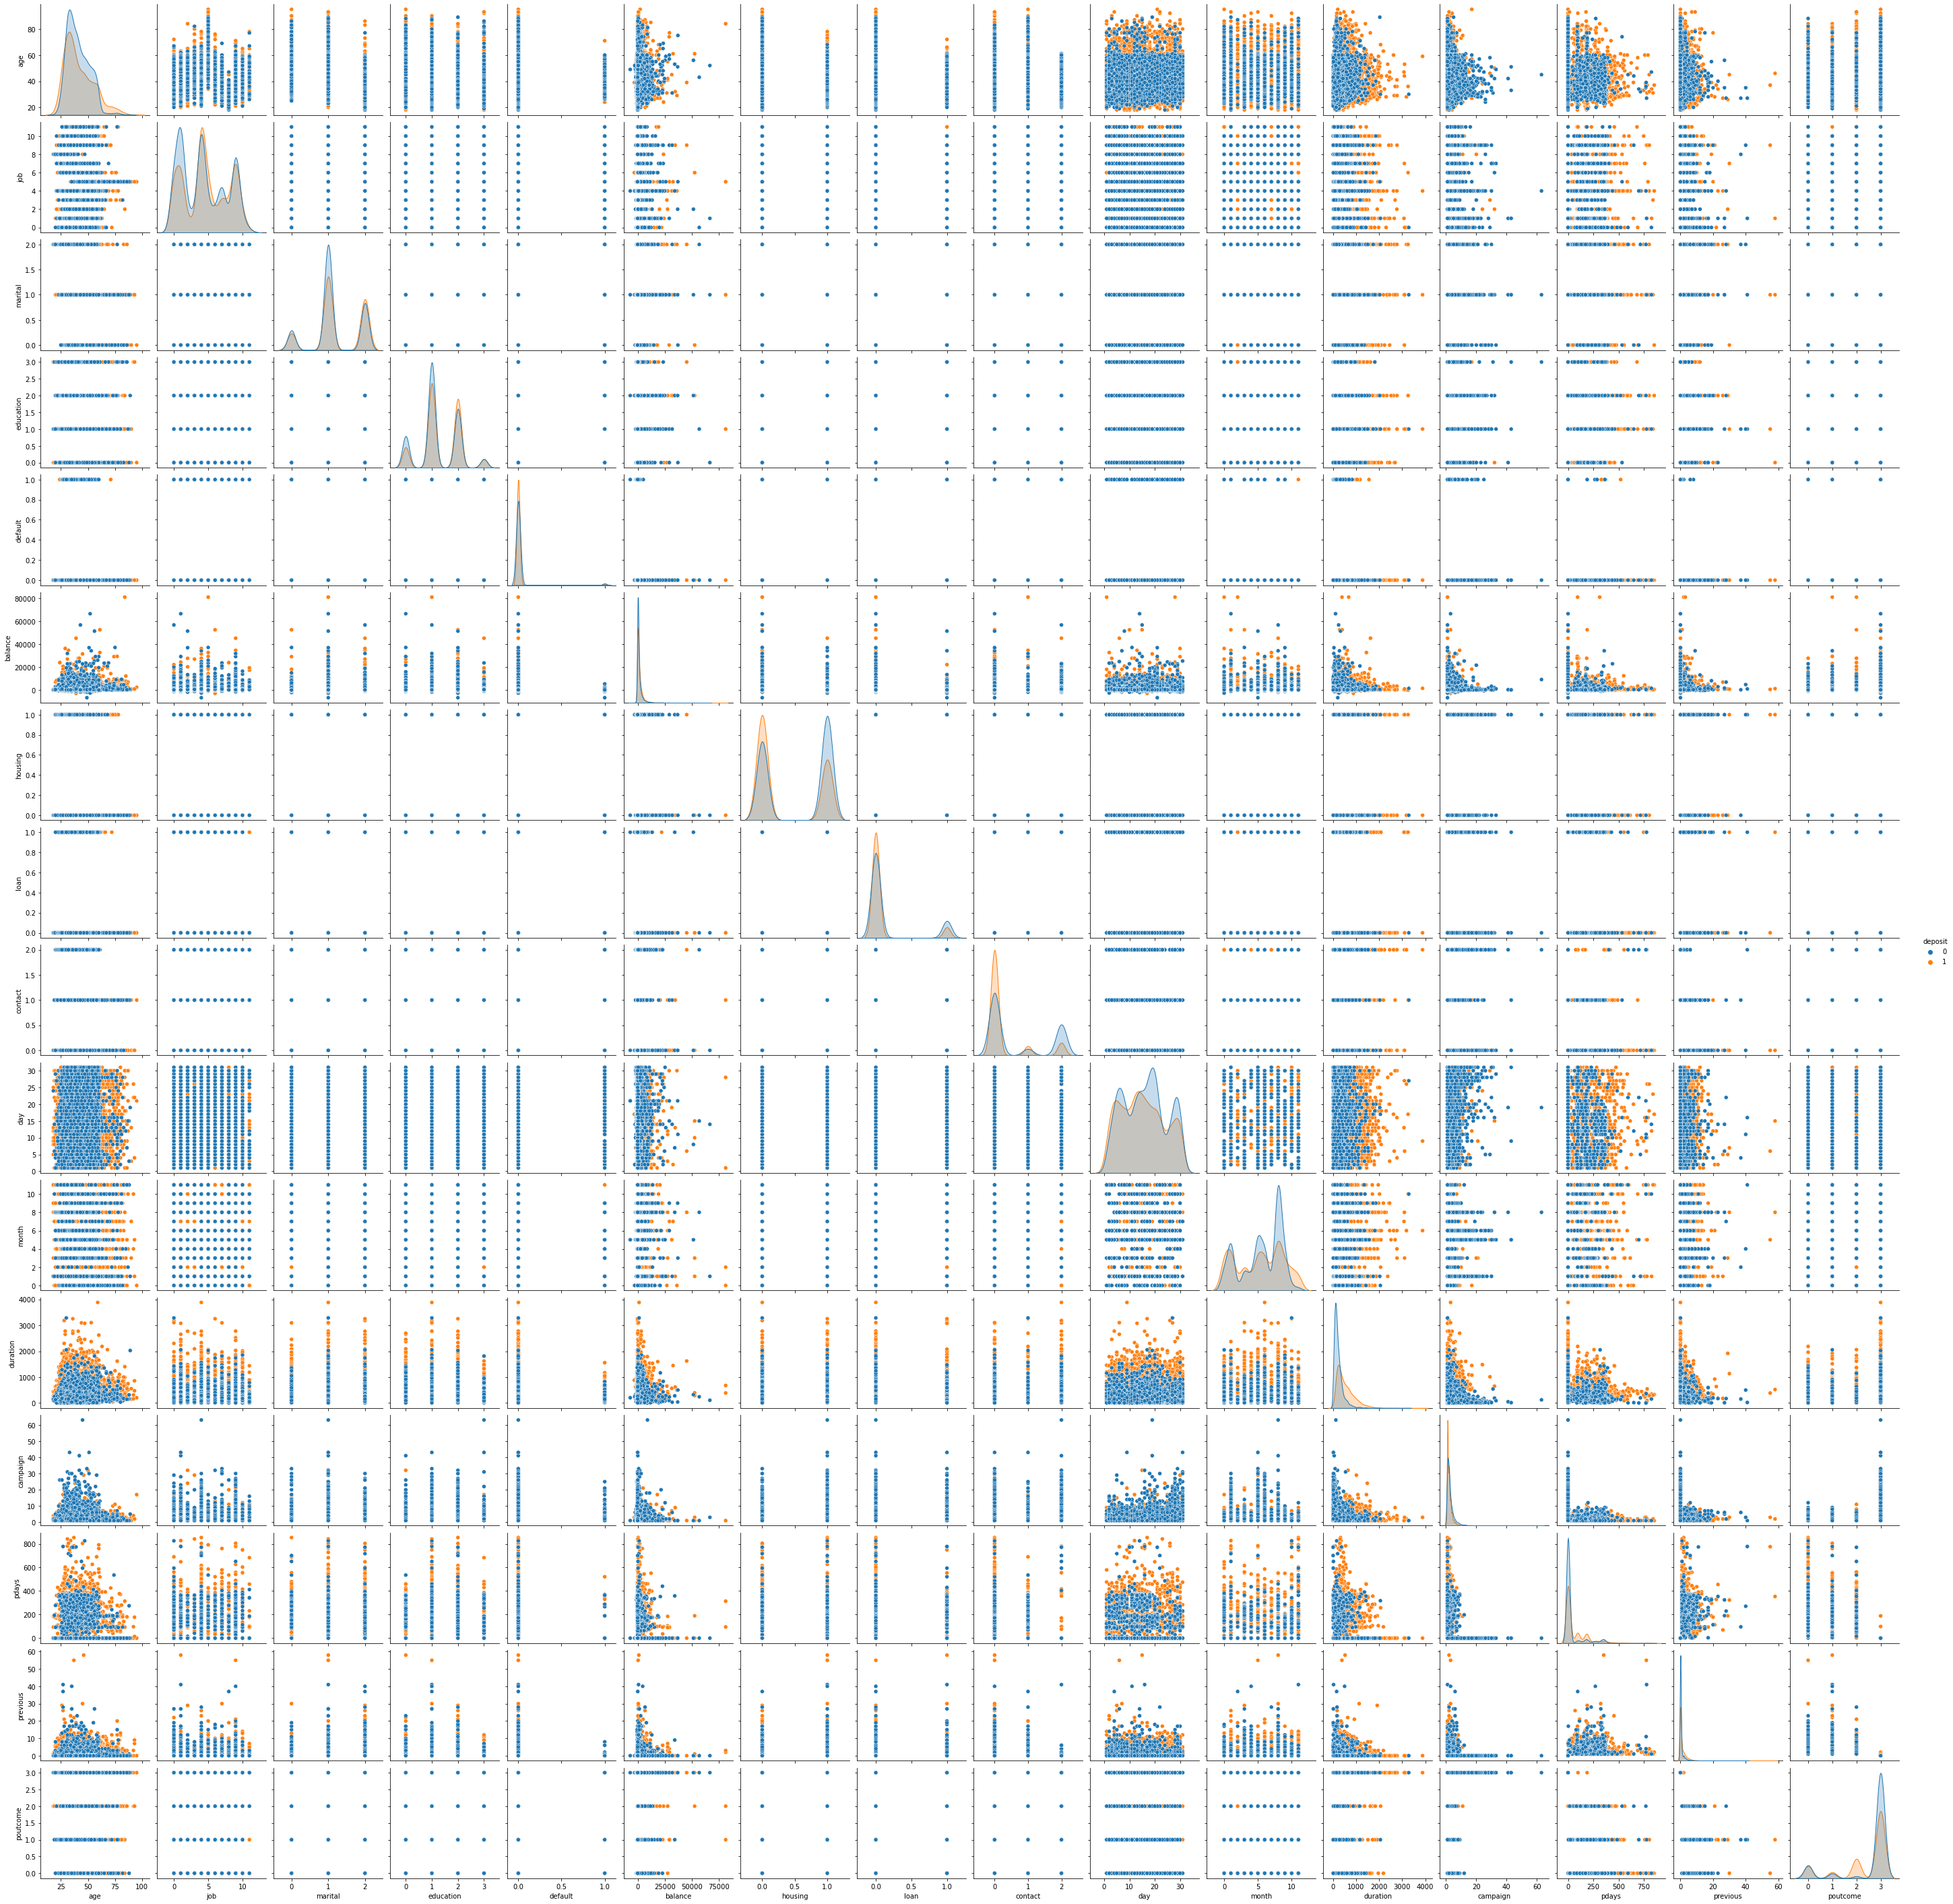

In [39]:
# Bank_Data 데이터의 pairplot
sns.pairplot(_Bank_Data, hue='deposit')

In [37]:
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('###',model.__class__.__name__,'###')
    print( model.score(X_test, y_test ) )

In [31]:
#test, train 데이터 나누기
Y = _Bank_Data['deposit']
X = _Bank_Data.drop(['deposit'], axis = 1, inplace = False)
trainX, testX, trainY, testY = train_test_split(X,Y)

In [36]:
print(trainY.shape)

(8371,)


In [48]:
KN_MD = KNeighborsClassifier()
RF_MD = RandomForestClassifier(n_estimators=300)
GB_MD = GradientBoostingClassifier(random_state=10)
XG_MD = XGBClassifier(n_estimators=300)
LG_MD = LGBMClassifier(n_estimators=300)
for _MD in [KN_MD, RF_MD, GB_MD, XG_MD, LG_MD]:
    get_model_predict ( _MD, trainX, testX, trainY, testY)

### KNeighborsClassifier ###
0.7517018989609459
### RandomForestClassifier ###
0.8419921175206019
### GradientBoostingClassifier ###
0.8373342887853816
### XGBClassifier ###
0.8416338230025081
### LGBMClassifier ###
0.8573987817986385


In [ ]:
# 각각의 독립 변수의 사용 가치 판단 
fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(XGB_MD, ax=ax)

In [ ]:
def plotFeatureList(model, X):
    coef = pd.Series(model.coef_, index=X.columns)
    coef_sort = coef.sort_values(ascending=False)
    sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [44]:
class Densce_Model(tf.keras.Model):
    def __init__(self):
        super(Densce_Model, self).__init__()
        self.fc     = Dense(200, activation = 'relu')
        self.drop   = Dropout(0.5)
        self.fc2    = Dense(100, activation = 'relu')
        self.drop2  = Dropout(0.5)
        self.Output = Dense(1 , activation = 'sigmoid')
    def call(self, inputs ):
        x = self.fc     (inputs)
        x = self.drop   (x)
        x = self.fc2    (x)
        x = self.drop2  (x)
        output = self.Output (x)
        return output

In [46]:
dense_Model = Densce_Model()
dense_Model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
# tf.keras.callbacks.EarlyStopping   
# tf.keras.callbacks.ModelCheckpoint                 
dense_Model.fit(trainX, trainY, epochs=10, batch_size=8)

Epoch 1/10
1047/1047 [==============================] - 6s 6ms/step - loss: 21.0522 - accuracy: 0.5490
Epoch 2/10
1047/1047 [==============================] - 6s 5ms/step - loss: 1.1566 - accuracy: 0.5956
Epoch 3/10
1047/1047 [==============================] - 6s 6ms/step - loss: 0.7733 - accuracy: 0.6027
Epoch 4/10
1047/1047 [==============================] - 6s 6ms/step - loss: 0.7593 - accuracy: 0.6255
Epoch 5/10
1047/1047 [==============================] - 6s 6ms/step - loss: 0.6685 - accuracy: 0.6318
Epoch 6/10
1047/1047 [==============================] - 6s 6ms/step - loss: 0.6561 - accuracy: 0.6374
Epoch 7/10
1047/1047 [==============================] - 6s 6ms/step - loss: 0.6442 - accuracy: 0.6542
Epoch 8/10
1047/1047 [==============================] - 6s 6ms/step - loss: 0.6532 - accuracy: 0.6637
Epoch 9/10
1047/1047 [==============================] - 6s 6ms/step - loss: 0.6238 - accuracy: 0.6611
Epoch 10/10
1047/1047 [==============================] - 6s 6ms/step - loss: 0.63

In [47]:
eval = dense_Model.evaluate(testX, (testY))
print('{0} 정확도: {1:.4f}, Loss: {2:.4f}'.format(dense_Model.__class__.__name__, eval[1], eval[0]))

88/88 [==============================] - 0s 3ms/step - loss: 0.5428 - accuracy: 0.7281
Densce_Model 정확도: 0.7281, Loss: 0.5428
